## Employees Burning Out

In [42]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, RobustScaler,OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor


## EDA

In [2]:
data = pd.read_csv('/content/train.csv')
data.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2.0,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Employee ID           22750 non-null  object 
 1   Date of Joining       22750 non-null  object 
 2   Gender                22750 non-null  object 
 3   Company Type          22750 non-null  object 
 4   WFH Setup Available   22750 non-null  object 
 5   Designation           22750 non-null  float64
 6   Resource Allocation   21369 non-null  float64
 7   Mental Fatigue Score  20633 non-null  float64
 8   Burn Rate             21626 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.6+ MB


In [ ]:
for i in data.columns:
  print(i)
  print(data[i].unique())
  print()

Employee ID
['fffe32003000360033003200' 'fffe3700360033003500'
 'fffe31003300320037003900' ... 'fffe390032003000'
 'fffe33003300320036003900' 'fffe3400350031003800']

Date of Joining
['2008-09-30' '2008-11-30' '2008-03-10' '2008-11-03' '2008-07-24'
 '2008-11-26' '2008-01-02' '2008-10-31' '2008-12-27' '2008-03-09'
 '2008-03-16' '2008-05-12' '2008-01-20' '2008-02-23' '2008-05-14'
 '2008-02-03' '2008-03-17' '2008-03-28' '2008-05-29' '2008-06-27'
 '2008-08-31' '2008-01-15' '2008-05-04' '2008-11-17' '2008-09-14'
 '2008-10-09' '2008-10-11' '2008-09-18' '2008-09-16' '2008-12-16'
 '2008-05-03' '2008-08-04' '2008-07-31' '2008-06-17' '2008-04-28'
 '2008-10-30' '2008-02-27' '2008-06-22' '2008-02-18' '2008-06-24'
 '2008-12-08' '2008-08-05' '2008-04-11' '2008-03-26' '2008-08-09'
 '2008-08-28' '2008-03-21' '2008-07-22' '2008-05-20' '2008-01-23'
 '2008-09-10' '2008-05-26' '2008-12-22' '2008-04-08' '2008-02-25'
 '2008-04-24' '2008-01-08' '2008-11-20' '2008-09-11' '2008-06-11'
 '2008-02-28' '2008-08-20

In [ ]:
data.describe() # numerical

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
count,22750.000000,21369.000000,20633.000000,21626.000000
mean,2.178725,4.481398,5.728188,0.452005
std,1.135145,2.047211,1.920839,0.198226
min,0.000000,1.000000,0.000000,0.000000
25%,1.000000,3.000000,4.600000,0.310000
50%,2.000000,4.000000,5.900000,0.450000
75%,3.000000,6.000000,7.100000,0.590000
max,5.000000,10.000000,10.000000,1.000000


In [ ]:
data.describe(exclude = 'number') # categorical

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available
count,22750,22750,22750,22750,22750
unique,22750,366,2,2,2
top,fffe32003000360033003200,2008-01-06,Female,Service,Yes
freq,1,86,11908,14833,12290


## Feature Engineering

In [ ]:
# current_date = pd.to_datetime('today')

# data["Date of Joining"] = pd.to_datetime(data["Date of Joining"])
# def create_days_count(data):
#     return (current_date - data["Date of Joining"])

# data["days_count"] = data.apply(create_days_count, axis=1)
# data["days_count"] = data["days_count"].dt.days

In [ ]:
data.head()

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,Female,Service,No,2.0,3.0,3.8,0.16
1,Male,Service,Yes,1.0,2.0,5.0,0.36
3,Male,Service,Yes,1.0,1.0,2.6,0.20
4,Female,Service,No,3.0,7.0,6.9,0.52
5,Male,Product,Yes,2.0,4.0,3.6,0.29


In [ ]:

# Assuming 'dat of joining' is a column in the dataframe,
# this code will extract year, month, and day into separate columns.

# data['Year'] = pd.to_datetime(data['Date of Joining']).dt.year
# data['Month'] = pd.to_datetime(data['Date of Joining']).dt.month
# data['Day'] = pd.to_datetime(data['Date of Joining']).dt.day

# Display the first few rows to verify the changes
# data.head()


In [ ]:
data.dropna(inplace=True)
data.drop(columns=['Date of Joining','Employee ID','Date of Joining'], inplace=True)

In [ ]:
for i in data.columns:
  print(i)
  print(data[i].unique())
  print()

Gender
['Female' 'Male']

Company Type
['Service' 'Product']

WFH Setup Available
['No' 'Yes']

Designation
[2. 1. 3. 0. 4. 5.]

Resource Allocation
[ 3.  2.  1.  7.  4.  6.  5.  8. 10.  9.]

Mental Fatigue Score
[ 3.8  5.   2.6  6.9  3.6  7.9  4.4  5.3  1.8  5.8  4.7  5.9  6.7  4.
  7.6  6.3  6.6  7.4  3.9  3.   8.7  7.3  5.4  6.   7.5 10.   6.4  5.6
  6.1  3.1  8.   6.8  4.9  9.2  6.5  6.2  8.2  4.1  4.3  0.8  2.9  2.
  5.1  9.1  0.   5.7  8.3  5.5  7.   3.3  7.2  5.2  4.5  7.8  8.1  8.6
  9.5  3.5  4.8  2.4  3.7  1.   7.7  8.8  8.9  9.3  4.6  9.9  0.5  2.8
  9.   3.4  4.2  2.7  1.3  3.2  8.4  7.1  9.4  2.1  9.7  1.6  2.5  1.7
  9.6  0.7  0.2  1.2  9.8  8.5  2.2  1.1  0.9  2.3  0.4  1.9  1.4  0.6
  1.5  0.3  0.1]

Burn Rate
[0.16 0.36 0.2  0.52 0.29 0.62 0.33 0.5  0.12 0.51 0.32 0.39 0.59 0.22
 0.57 0.47 0.46 0.44 0.6  0.19 0.31 0.81 0.42 0.56 0.53 0.45 0.94 0.37
 0.65 0.49 0.38 0.15 0.61 0.26 0.28 0.71 0.8  0.63 0.79 0.72 0.34 0.27
 0.66 0.67 0.05 0.11 0.41 0.43 0.85 0.35 0.   0.55 

## Model Processing

In [ ]:
X=data.drop(columns=['Burn Rate'])
y=data['Burn Rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(14872, 6)
(3718, 6)
(14872,)
(3718,)


In [ ]:
# Memisahkan kolom numerik dan kategorikal
numerical_cols = ['Designation', 'Resource Allocation', 'Mental Fatigue Score']
categorical_cols = ['Gender', 'Company Type', 'WFH Setup Available']

# Membuat transformer untuk kolom numerik dan kategorikal
numerical_transformer = Pipeline(steps=[
    ('scaler', RobustScaler())
])

# Modify the categorical transformer to use OneHotEncoder
categorical_transformer = Pipeline(steps=[
    ('Ordinal', OrdinalEncoder())
])

# Menggabungkan transformer menggunakan ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Membuat pipeline preprosessing
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

In [ ]:
X_train = pipeline.fit_transform(X_train) # save train weight

## Hyperparameter Tuning & Training

In [ ]:
param= {'algo__reg_lambda': np.arange(0.0,0.3, 0.01),
        'algo__reg_alpha': np.arange(0.0,0.3, 0.01),
        'algo__n_estimators': range(140,150),
        'algo__max_depth': range(16,25),
        'algo__learning_rate': np.arange(0.1, 0.3, 0.01),
        'algo__gamma': range(5,15)
        }

model = RandomizedSearchCV(XGBRegressor(),param,n_iter=150, cv=6,verbose=1)
model.fit(X_train, y_train)



## Model Evaluation

In [ ]:
X_test = pipeline.transform(X_test) # transform test

In [ ]:
print("Best Parameters:", model.best_params_)
# R2 score
print("Train Accuracy:", model.score(X_train, y_train))
print("Test Accuracy:", model.score(X_test, y_test))

Best Parameters: {'algo__reg_lambda': 0.11, 'algo__reg_alpha': 0.18, 'algo__n_estimators': 144, 'algo__max_depth': 20, 'algo__learning_rate': 0.15999999999999998, 'algo__gamma': 14}
Train Accuracy: 0.9394093934008064
Test Accuracy: 0.9257389911849984


In [ ]:
# rmse metrics
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE:", rmse)


RMSE: 0.05340391541176174


<Axes: xlabel='Burn Rate'>

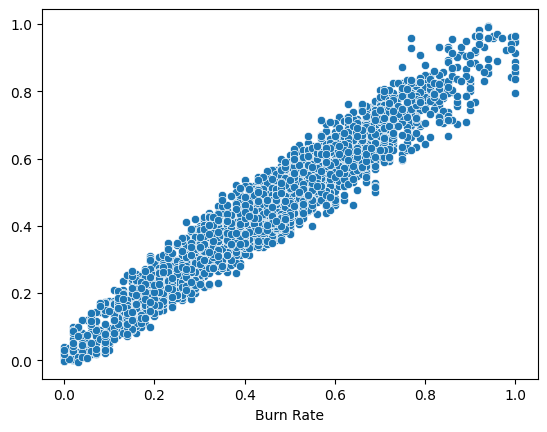

In [ ]:
import seaborn as sns

sns.scatterplot(x=y_test, y=y_pred)

## Weight Saving & Testing

In [ ]:


import joblib
joblib.dump(model, 'model_burnout.pkl')
joblib.dump(pipeline,'pipeline.pkl')
# joblib.dump(preprocessor,'preprocessor.pkl')

['pipeline.pkl']

In [ ]:

import joblib

# Assuming 'pipeline' is your pipeline object
pipeline = joblib.load('/content/pipeline.pkl')


In [ ]:

input_data = {
'Designation': [2.],
'Resource Allocation': [3.],
'Mental Fatigue Score': [5],
'Gender': ['Female'],
'Company Type': ['Service'],
'WFH Setup Available': ["Yes"]
}

input_df = pd.DataFrame(input_data)

In [ ]:
input_df

,Designation,Resource Allocation,Mental Fatigue Score,Gender,Company Type,WFH Setup Available
0,2.0,3.0,5,Female,Service,Yes


In [ ]:
inf = pipeline.transform(input_df)

In [ ]:
model_ku = joblib.load('/content/model_burnout.pkl')


In [ ]:
model_ku.predict(inf)

array([0.33940557], dtype=float32)

## Others

In [ ]:
# X_train_prep = preprocessor.fit_transform(X_train)
# X_test_prep = preprocessor.transform(X_test)

In [ ]:

# import tensorflow as tf
# from tensorflow import keras

# # Define the model architecture
# model = keras.Sequential([
#     keras.layers.Dense(32, activation='relu', input_shape=(X_train_prep.shape[1],)),
#     keras.layers.Dense(64, activation='relu'),
#     keras.layers.Dense(128, activation='relu'),
#     keras.layers.Dense(256, activation='relu'),
#     keras.layers.Dense(64, activation='relu'),
#     keras.layers.Dense(1)  # Output layer with a single neuron for regression
# ])

# # Compile the model
# model.compile(optimizer='adam', loss='mse')  # Mean squared error for regression

# # Train the model
# model.fit(X_train_prep, y_train, epochs=25, batch_size=64, validation_split=0.2, validation_batch_size=16)  # Adjust epochs and batch size as needed


In [ ]:
# # Evaluate the model
# y_pred = model.predict(X_test_prep)
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# print("Mean Squared Error:", mse)
# print("R-squared:", r2)

In [ ]:
# data_test = pd.read_csv('/content/test_burnout.csv')
# data_test.head()

In [ ]:
# data_test.dropna(inplace=True)
# data_test.drop(columns=['Date of Joining','Employee ID','Date of Joining'], inplace=True)

In [ ]:
# model.predict(preprocessor.transform(data_test))